In [1]:
!pip install git+https://github.com/imanring/BSTPP.git

  Cloning https://github.com/imanring/BSTPP.git to /tmp/pip-req-build-4bsvyi4m
  Running command git clone --filter=blob:none --quiet https://github.com/imanring/BSTPP.git /tmp/pip-req-build-4bsvyi4m
  Resolved https://github.com/imanring/BSTPP.git to commit b32ace1a87699ad54752e96b0ecf2bb84e272307
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for BSTPP, since package 'wheel' is not installed.
  Running setup.py install for BSTPP ... done


In [1]:
from bstpp.main import LGCP_Model, Hawkes_Model, load_Chicago_Shootings, load_Boko_Haram
import numpyro.distributions as dist
import numpy as np

# Chicago Shootings Dataset

### Cox Hawkes Model

In [2]:
data = load_Chicago_Shootings()

In [4]:
column_names = ['UNEMP_DENS','MEDINC','MED_HV','assoc_plus','VACANT_DEN',
       'VAC_HU_pct','HCUND20K_L','POP_DENS','CT_SP_WCHI']
model = Hawkes_Model(data['events_2022'],
                            data['boundaries'],True,
                            spatial_cov=data['covariates'],cov_names = column_names,
                            a_0=dist.Normal(1,10), alpha = dist.Beta(20,60),beta=dist.HalfNormal(2.0)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:109: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  args['A_area'] = A.area.sum()/((A_[0,1]-A_[0,0])*(A_[1,1]-A_[1,0]))
/home/imanring/PointProcess/Cox_Hawkes/cox_hawkes/lib/python3.10/site-packages/geopandas/geodataframe.py:2189: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  return geopandas.sjoin(left_df=self, right_df=df, *args, **kwargs)  # noqa: B026
/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:210: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before thi

In [5]:
model.load_rslts('output/Chicago_Shootings/cox_hawkes/final/output_cov.pkl')

In [4]:
model.run_mcmc()

sample: 100%|███████████████████████████| 1500/1500 [00:25<00:00, 57.90it/s, 255 steps of size 1.44e-02. acc. prob=0.94]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0      3.57      0.59      3.58      2.61      4.53    505.82      1.00
          w[0]      0.38      0.05      0.38      0.30      0.47    631.60      1.00
          w[1]      0.01      0.07      0.00     -0.10      0.13   1094.76      1.00
          w[2]     -0.17      0.08     -0.17     -0.29     -0.02    906.84      1.00
          w[3]     -0.09      0.07     -0.09     -0.20      0.02    899.24      1.00
          w[4]      0.09      0.03      0.09      0.04      0.14    611.49      1.00
          w[5]      0.03      0.04      0.03     -0.03      0.09    699.00      1.00
          w[6]      0.12      0.02      0.12      0.08      0.15   1075.75      1.00
          w[7]      0.46      0.04      0.46      0.39      0.53    944.62      1.01
          w[8]     -0.15      0.04     -0.15     -0.21     -0.10    728.10      1.00
  z_spatial[0]      0.78      0.23      0.78      0.40      1.12

In [10]:
model.log_expected_likelihood(data['events_2023'])

7510.46630859375

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
alpha,0.520330,0.027263,19.085665,0.000000e+00,0.466363,0.573409
beta,15.285158,0.919334,16.626341,0.000000e+00,13.571016,17.119894
sigmax_2,0.000014,0.000002,8.013816,1.110223e-15,0.000011,0.000018


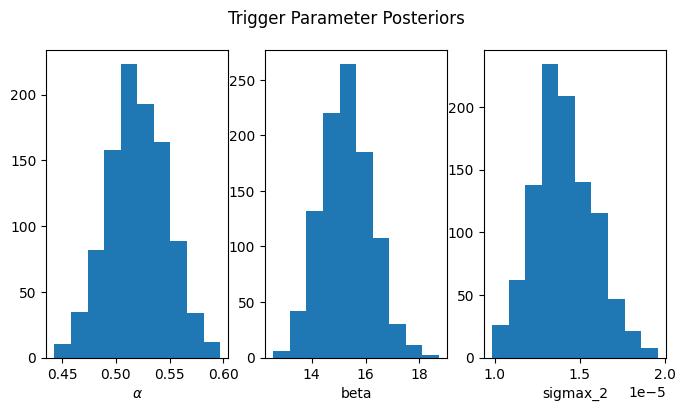

In [11]:
model.plot_trigger_posterior()

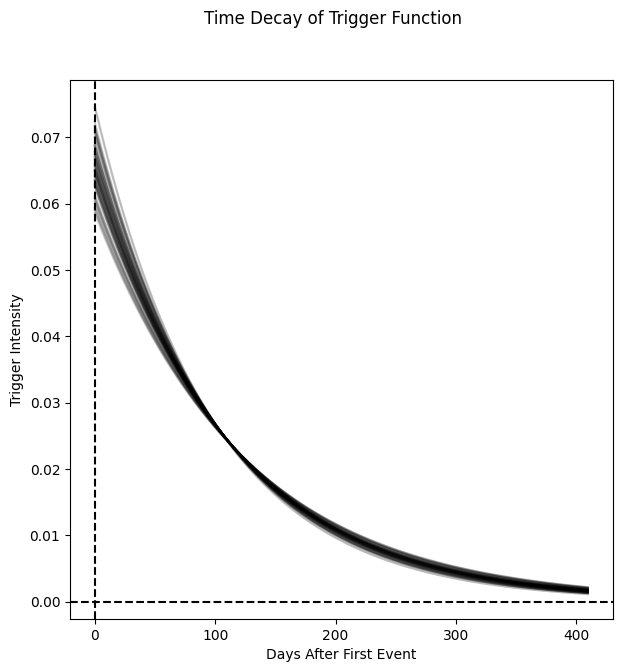

In [6]:
model.plot_trigger_time_decay()

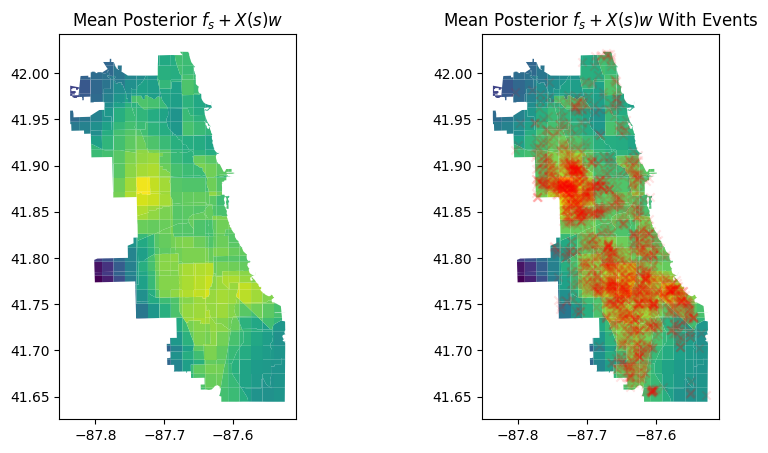

In [8]:
model.plot_spatial(include_cov=True)

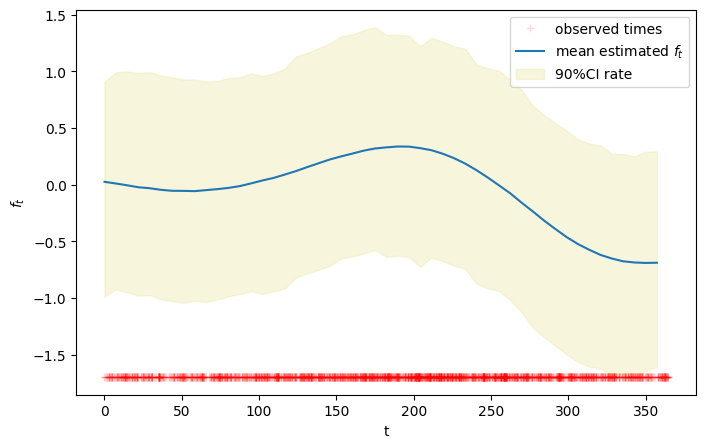

In [9]:
model.plot_temporal()

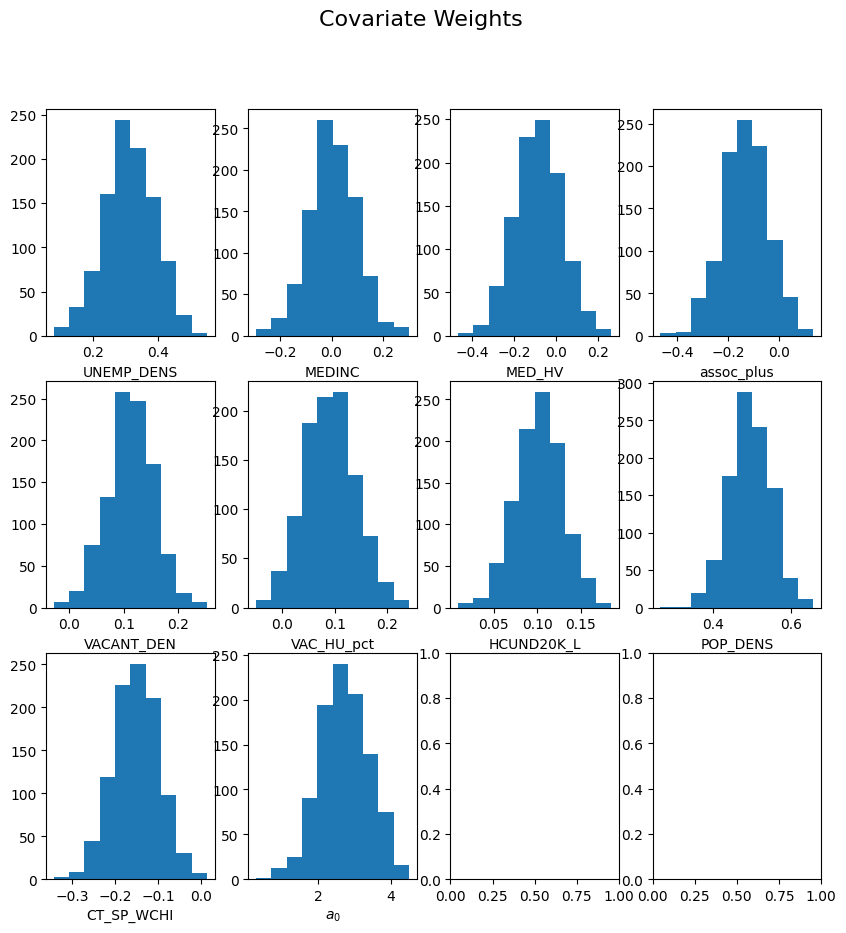

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
UNEMP_DENS,0.312386,0.077121,4.050601,0.000051,0.158358,0.456934
MEDINC,0.004424,0.093216,0.047456,0.962150,-0.191997,0.188561
MED_HV,-0.084747,0.112503,-0.753291,0.451275,-0.303382,0.135146
assoc_plus,-0.132593,0.090843,-1.459587,0.144404,-0.324232,0.041006
VACANT_DEN,0.113201,0.043158,2.622962,0.008717,0.026483,0.196128
VAC_HU_pct,0.090907,0.049570,1.833926,0.066665,-0.003047,0.190859
HCUND20K_L,0.102504,0.027050,3.789374,0.000151,0.049604,0.154991
POP_DENS,0.494260,0.054414,9.083347,0.000000,0.385863,0.595219
CT_SP_WCHI,-0.150656,0.053644,-2.808450,0.004978,-0.253478,-0.048819
a_0,2.715797,0.682109,3.981468,0.000068,1.324400,4.006296


In [10]:
model.cov_weight_post_summary()

# Boko Haram Dataset

### Log Gaussian Cox Process Model

In [2]:
data = load_Boko_Haram()
column_names = ['droughtstart_speibase', 'urban_ih_log', 'droughtyr_speigdm',
       'herb_gc', 'capdist', 'grass_ih_log', 'nlights_sd_log', 'water_gc_log',
       'pop_gpw_sd_log', 'pasture_ih']
lgcp_bh_model = LGCP_Model(data['events'],data['boundaries'],
                            spatial_cov=data['covariates'],cov_grid_size=(0.5,0.5),
                            cov_names = column_names,
                            a_0=dist.Normal(1,10)
                           )

/home/imanring/PointProcess/Cox_Hawkes_Cov/bstpp/main.py:210: UserWarning: `keep_geom_type=True` in overlay resulted in 4466 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  intersect = gpd.overlay(comp_grid, spatial_cov, how='intersection')


In [3]:
lgcp_bh_model.run_mcmc()

sample: 100%|███████████████████████████| 1500/1500 [00:36<00:00, 41.45it/s, 511 steps of size 1.25e-02. acc. prob=0.95]



                    mean       std    median      5.0%     95.0%     n_eff     r_hat
           a_0     -3.18      0.61     -3.19     -4.13     -2.16    491.08      1.00
          w[0]     -0.39      0.11     -0.39     -0.59     -0.22    658.23      1.00
          w[1]     -0.07      0.05     -0.07     -0.16     -0.00    651.68      1.00
          w[2]     -0.05      0.03     -0.05     -0.09      0.00    837.27      1.00
          w[3]      0.13      0.07      0.13      0.02      0.24    867.39      1.00
          w[4]      0.63      0.08      0.63      0.51      0.75   1055.48      1.00
          w[5]      0.18      0.04      0.18      0.12      0.23    906.50      1.00
          w[6]      0.78      0.04      0.78      0.72      0.86    927.72      1.00
          w[7]     -0.12      0.04     -0.12     -0.19     -0.05    994.49      1.00
          w[8]      0.78      0.08      0.78      0.67      0.93    661.91      1.00
          w[9]      0.58      0.05      0.58      0.50      0.67

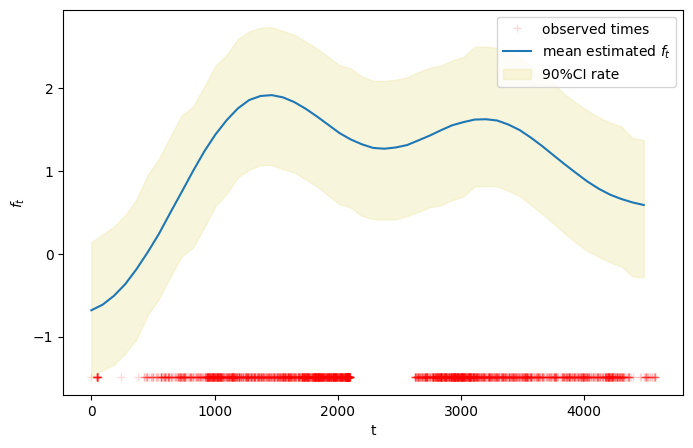

In [4]:
lgcp_bh_model.plot_temporal()

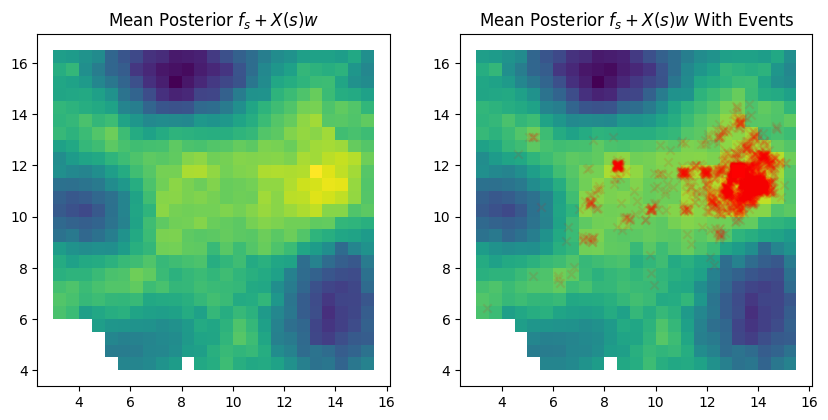

In [5]:
lgcp_bh_model.plot_spatial(include_cov=True)

,Post Mean,Post Std,z,P>|z|,[0.025,0.975]
droughtstart_speibase,-0.393704,0.113655,-3.464037,5.321333e-04,-0.616811,-0.171760
urban_ih_log,-0.068996,0.047387,-1.455993,1.453947e-01,-0.157801,0.025017
droughtyr_speigdm,-0.046708,0.028325,-1.649012,9.914511e-02,-0.098879,0.011444
herb_gc,0.128528,0.066626,1.929096,5.371897e-02,-0.001818,0.256239
capdist,0.631130,0.075291,8.382559,0.000000e+00,0.480287,0.783103
grass_ih_log,0.179572,0.036071,4.978258,6.415900e-07,0.108358,0.247056
nlights_sd_log,0.780560,0.042008,18.581089,0.000000e+00,0.700161,0.859844
water_gc_log,-0.122108,0.041723,-2.926630,3.426567e-03,-0.198359,-0.039363
pop_gpw_sd_log,0.782923,0.076487,10.236053,0.000000e+00,0.627051,0.931252
pasture_ih,0.582839,0.050643,11.508811,0.000000e+00,0.487036,0.681689


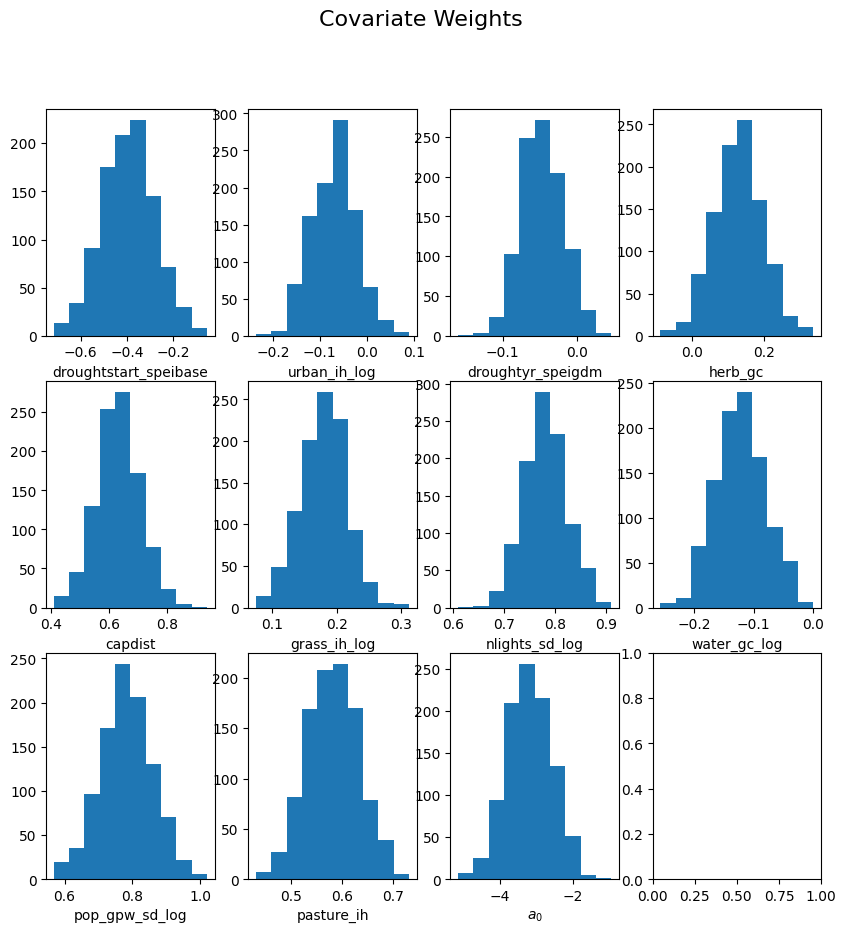

In [6]:
lgcp_bh_model.cov_weight_post_summary()